<a href="https://colab.research.google.com/github/keshavvprabhu/python-tutorials/blob/main/PlotlyBeginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read a Dataset

In [12]:
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


## Basic Operations on a Dataset

In [13]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [14]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [15]:
ufo.shape

(18241, 5)

In [16]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [17]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [18]:
ufo.isna().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

How do I rename Columns in a dataframe

In [20]:
ufo_columns = ufo.columns
ufo_columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [21]:
ufo.columns =ufo.columns.str.replace(' ','_')
ufo.head()
ufo['State']=ufo['State'].str.upper()

In [22]:
ufo.drop('Colors_Reported', axis=1).head()

,City,Shape_Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


## What was the most common shape observed?

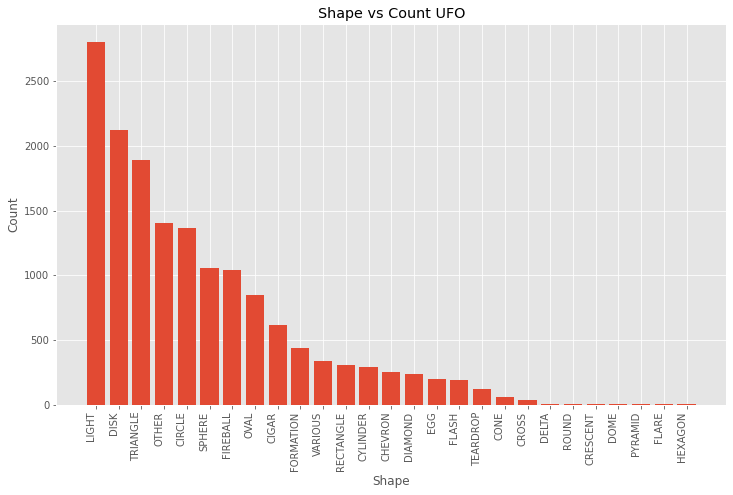

In [23]:
plt.style.use('ggplot')
ufo_shapes = pd.DataFrame(ufo.Shape_Reported.value_counts())
ufo_shapes.reset_index(inplace=True)
ufo_shapes.columns =['Shape_Reported', 'Count']
plt.figure(figsize=(12,7))
plt.xticks(rotation=90, ha='right')
plt.xlabel("Shape")
plt.ylabel('Count')
plt.title("Shape vs Count UFO")
plt.bar(ufo_shapes.Shape_Reported, ufo_shapes.Count )
plt.show()

## Using Plotly Express - Interactive Graph

## What was the most common Shape Observed?

In [24]:
import plotly.express as px
fig = px.bar(ufo_shapes, x=ufo_shapes.Shape_Reported, y=ufo_shapes.Count, text_auto=True)
fig.update_layout(title_text='Shape vs Count', title_x=0.5)
fig.update_xaxes(tickangle=-90)
fig.update_traces(textangle=-90, textposition='auto')
fig.show()

# Where was the most frequent sighting reported?

In [25]:
ufo_state = pd.DataFrame(ufo.State.value_counts())
ufo_state.reset_index(inplace=True)
ufo_state.columns=['State', "Count"]
fig = px.bar(ufo_state, x=ufo_state.State, y=ufo_state.Count, text_auto=True, color=ufo_state.Count, color_continuous_scale='viridis')
fig.update_layout(title_text='State vs Count', title_x=0.5)
fig.update_xaxes(tickangle=-90)
fig.update_traces(textangle=-90, textposition='auto')
fig.show()

In [26]:
ufo_state_shape_count = pd.DataFrame(ufo[['State', 'Shape_Reported']].value_counts())
ufo_state_shape_count.reset_index(inplace=True)
ufo_state_shape_count.columns=['State', 'Shape_Reported', 'Count']
# ufo_state_shape_count

fig = px.bar(ufo_state_shape_count, x=ufo_state_shape_count.State, 
             y=ufo_state_shape_count.Count,
             color=ufo_state_shape_count.Shape_Reported,
             color_continuous_scale='viridis',
            #  animation_group=ufo_state_shape_count['State'],
            #  animation_frame=ufo_state_shape_count['Shape_Reported'],
             )
fig.update_layout(title_text='UFO - Statewise Shape Count', title_x=0.5, transition = {'duration': 3000})
fig.update_xaxes(tickangle=-90)
fig.update_traces(textangle=-90)
fig.show()

In [27]:
fig1 = px.choropleth(ufo_state, locations=ufo_state.State, locationmode='USA-states',
                     color=ufo_state.Count, color_continuous_scale='viridis',
                     scope='usa',
                     )
fig1.show()

Plotly animation based on timing of observation

In [28]:
ufo_colors = pd.DataFrame(ufo.Colors_Reported.dropna().value_counts())
ufo_colors.reset_index(inplace=True)
ufo_colors.columns = ['Color', 'Count']
ufo_colors['ColorGroup'] = ufo_colors['Color']

ufo_colors.loc[ufo_colors['Count'] < 50, "ColorGroup"]='OTHER'

ufo_color_groups = ufo_colors.groupby('ColorGroup').agg('sum')
ufo_color_groups.reset_index(inplace=True)
ufo_color_groups


fig = px.pie(ufo_color_groups, 
             names=ufo_color_groups.ColorGroup, 
             values=ufo_color_groups.Count, 
             color=ufo_color_groups.Count, 
             hole=0.5, )

fig.update_layout(title_text='UFO Color Groups Observed', title_x=0.5)
fig.show()

## Pandas Pivoting Operations